<a href="https://colab.research.google.com/github/ricardoricrob76/topicos-especiais/blob/main/Analise_de_Risco_de_Credito_Empresa_Bancaria_ChicoBank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Autor: Ricardo Roberto de Lima - Data: 13/07/2024.

In [13]:
# Conjunto de importacoes
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
#Importação do pacote joblib
import joblib

In [3]:
# Criação do Data Frame Limite de Crédito com o arquivo original dados_limitecredito.csv
df_credito = pd.read_csv("dados_limitecredito.csv", encoding="utf-8")

In [4]:
df_credito.describe()

,ID,historico_credito,divida,garantias,renda,Risco
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,7.5000,2.071429,1.500000,1.214286,32300.785714,2.071429
std,4.1833,0.828742,0.518875,0.425815,15983.981781,0.916875
min,1.0000,1.000000,1.000000,1.000000,9000.000000,1.000000
25%,4.2500,1.250000,1.000000,1.000000,20945.000000,1.000000
50%,7.5000,2.000000,1.500000,1.000000,33950.000000,2.000000
75%,10.7500,3.000000,2.000000,1.000000,42416.500000,3.000000
max,14.0000,3.000000,2.000000,2.000000,56709.000000,3.000000


In [5]:
df_credito.head()

,ID,historico_credito,divida,garantias,renda,Risco
0,1,1,2,1,10000,3
1,2,2,2,1,28000,3
2,3,2,1,1,29000,2
3,4,2,1,1,38900,3
4,5,2,1,1,40000,1


In [6]:
df_credito.tail()

,ID,historico_credito,divida,garantias,renda,Risco
9,10,3,2,2,45600,1
10,11,3,2,1,9000,3
11,12,3,2,1,20000,2
12,13,3,2,1,56709,1
13,14,1,2,1,23780,3


In [7]:
#Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(df_credito[['historico_credito', 'divida', 'garantias', 'renda']])
#Definição do atributo de classificacao
data_classif = np.array(df_credito['Risco'])

In [18]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df_credito, size=35):
    corr = df_credito.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), values in np.ndenumerate(corr.values):
      ax.text(j, i, f'{values:.2f}', fontsize=22)

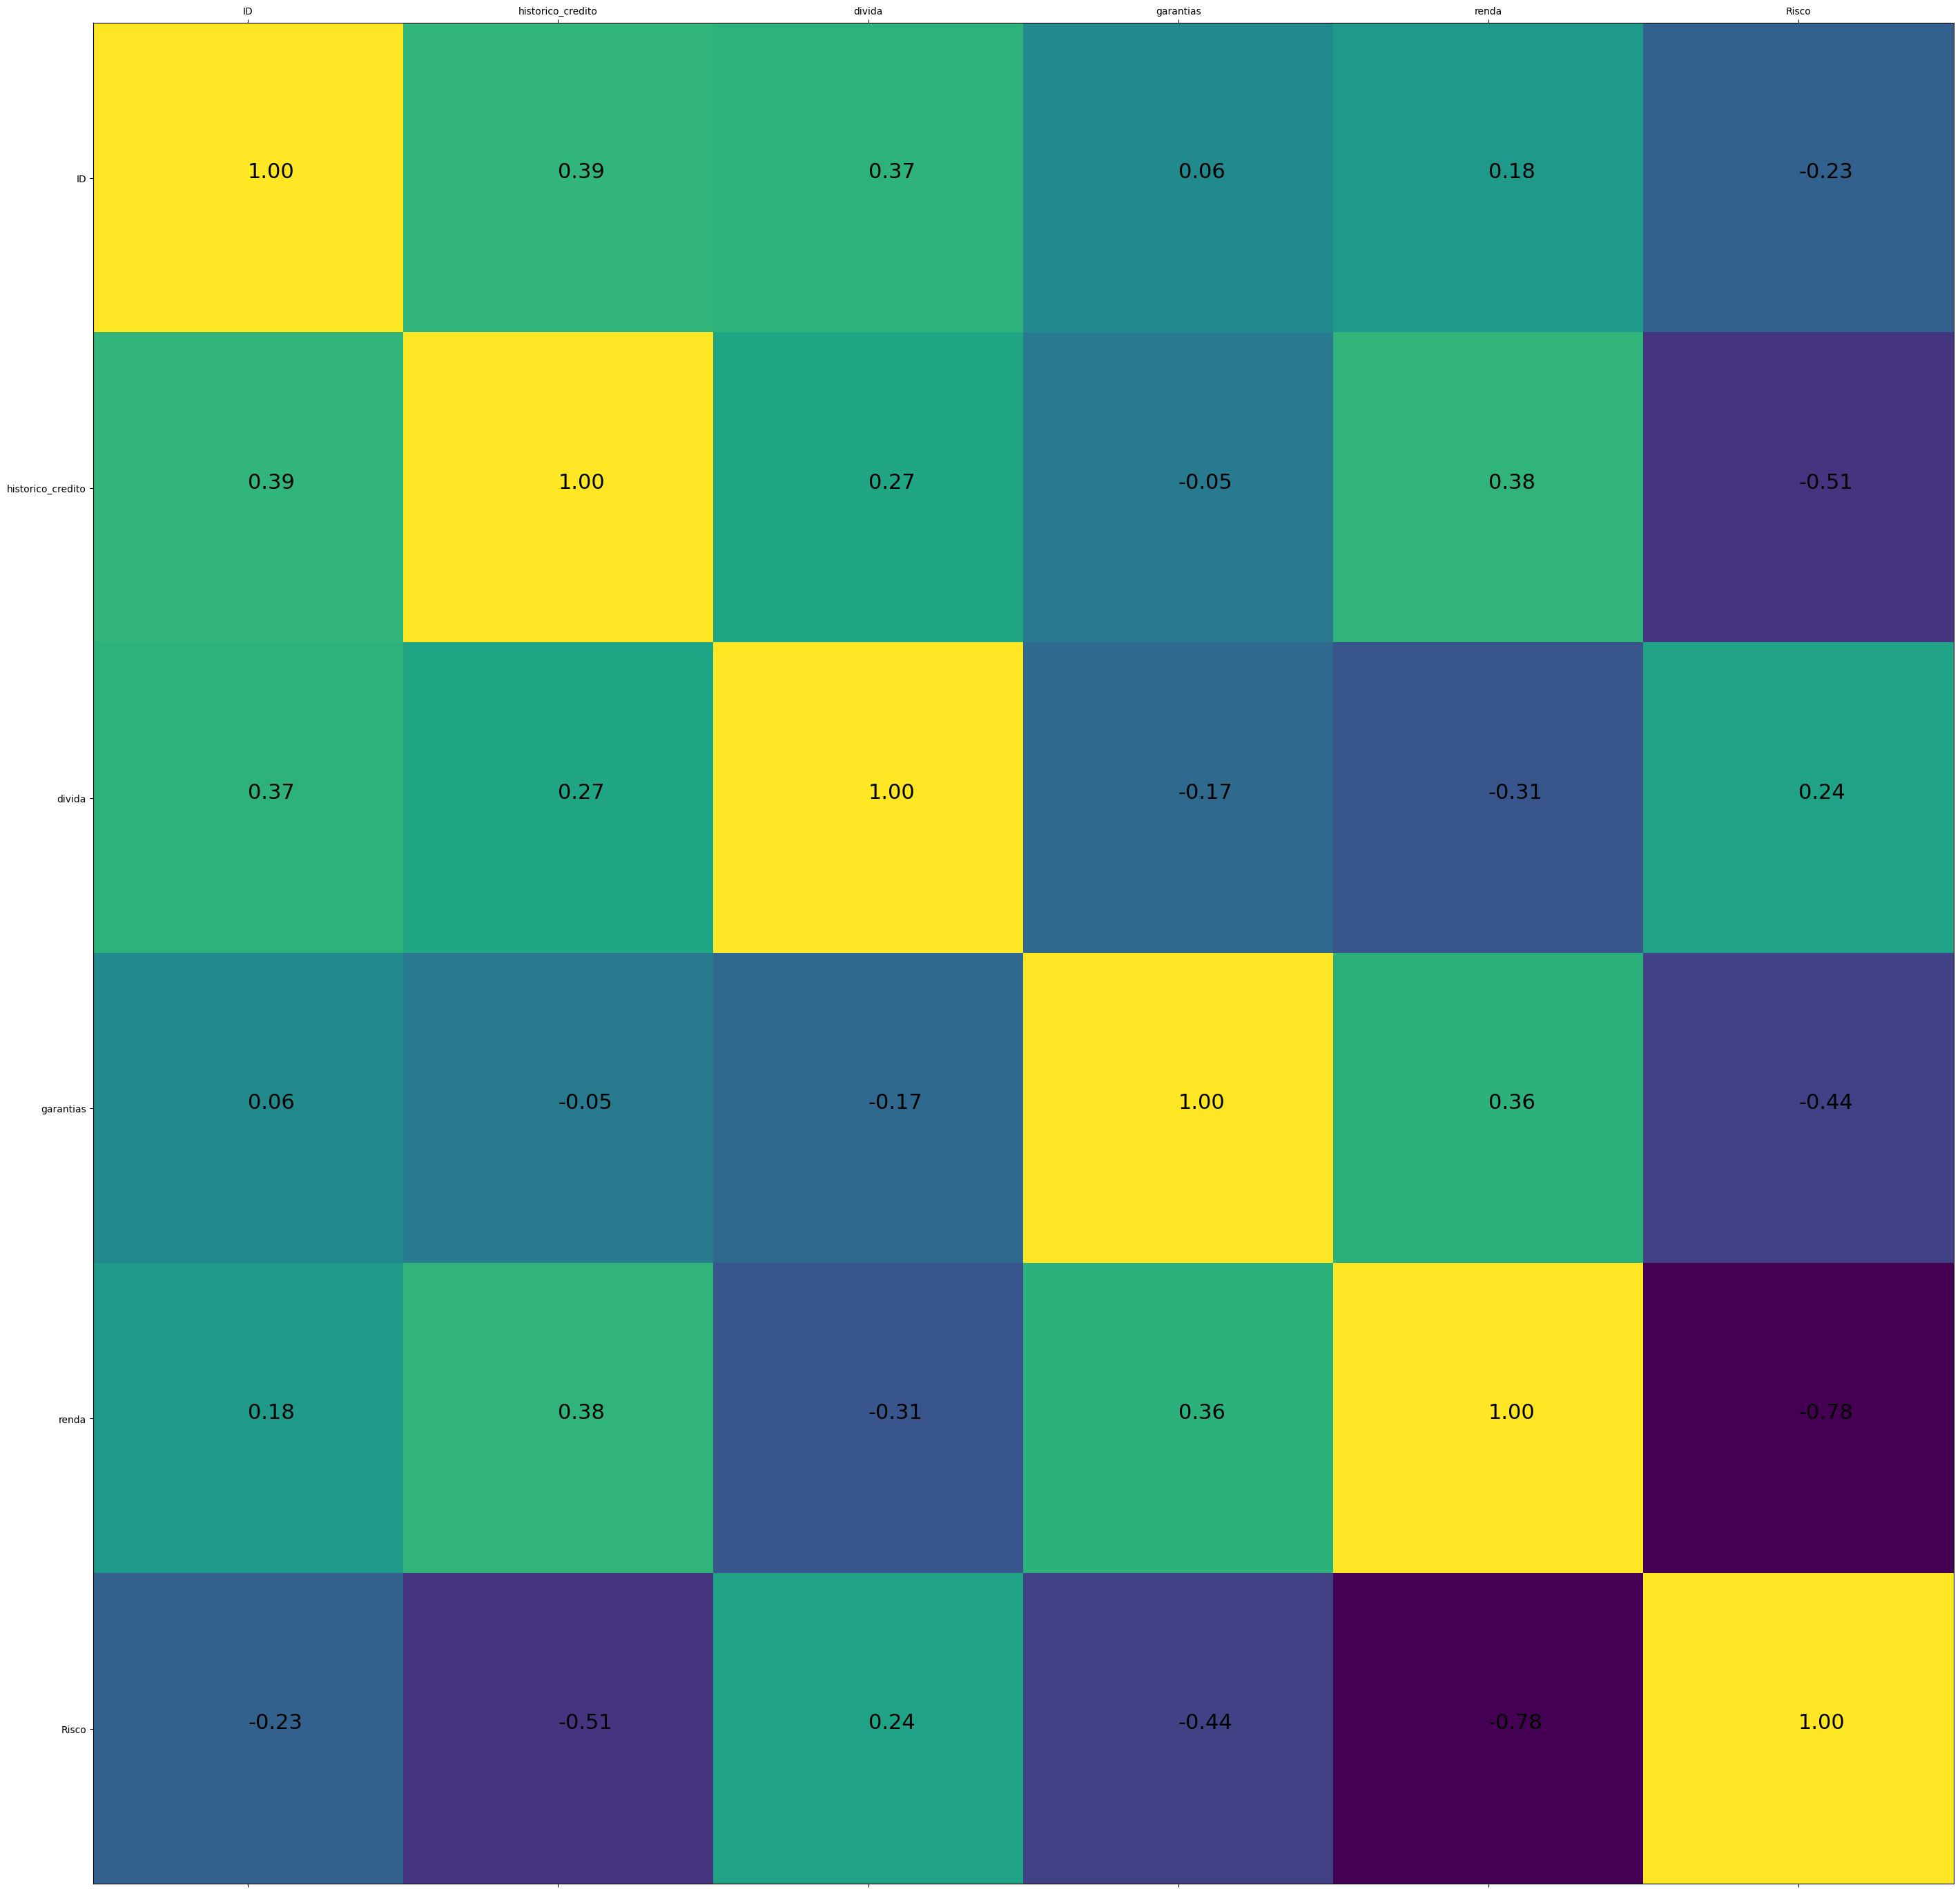

In [19]:
# Criando o gráfico - Matriz de Correlação..
plot_corr(df_credito)

In [20]:
# Definição dos conjuntos de treinamento e validação
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.25)

In [21]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[    2     2     1 28000]
 [    1     1     2 43222]
 [    3     2     1  9000]
 [    2     1     1 38900]
 [    3     2     2 45600]
 [    1     1     1 12000]
 [    3     1     1 56000]
 [    1     2     1 23780]
 [    2     1     1 29000]
 [    3     2     1 56709]]
Conjunto de Validacao
[[    2     1     2 40000]
 [    1     2     1 10000]
 [    2     1     1 40000]
 [    3     2     1 20000]]
-----------------------


In [23]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(df_credito.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(df_credito.index)) * 100))

71.43% nos dados de treino
28.57% nos dados de teste


In [24]:
#Treinamento do modelo com os dados atribuidos ao conjunto de treinamento
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [25]:
#Predição e acurácia para o conjunto de treinamento
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.8
Na Base de Treinamento


In [26]:
#Predição e acurácia para o conjunto de validação
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.25
na Base de Teste


In [27]:
#Persistência do modelo no arquivo modelo_mamifero_MNB.pkl
joblib.dump(modelo_NB, 'modelo_credito_MNB.pkl')

['modelo_credito_MNB.pkl']